In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("oil_production.csv")

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.drop("DATEPRD",axis = 1, inplace = True)

In [4]:
df.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,257.442241,105.339191,163.294586,35.298817,94.147654,61.049726,4535.43,649388.07,298.19
1,261.481233,105.364799,164.352071,34.697693,97.129162,65.804801,4379.88,629307.34,143.54
2,264.386001,105.410873,166.214057,34.779443,98.171944,64.987169,4509.07,638750.17,108.74
3,266.709086,105.395959,166.273529,34.054792,100.435557,67.330436,4319.02,612912.62,106.60
4,266.667137,105.410516,166.513059,34.395363,100.154078,66.986427,4417.66,625514.01,117.37


In [5]:
X = df.iloc[:,0:6]
#X = df[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P',"AVG_WHP_P", "DP_CHOKE_SIZE" ]]
Y = df.iloc[:,7]

In [6]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNet, SGDRegressor, Lasso

In [7]:
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [8]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected= True)

In [9]:
test_fraction = 0.15
val_fraction = 0.15
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_fraction, shuffle = True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size 
                                                  = val_fraction/(1-test_fraction), shuffle = True)

In [10]:
scaler_x = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train.as_matrix())
x_val = scaler_x.transform(x_val.as_matrix())
x_test = scaler_x.transform(x_test.as_matrix())

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_val = scaler_y.transform(y_val.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [11]:
y_act = scaler_y.inverse_transform(y_test).reshape(-1,1)

In [12]:
LR = LinearRegression()
LR.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
LR.coef_

array([[-1.96536351e+13,  8.66389181e-01,  1.84418729e+13,
         6.38231185e-02,  1.18486564e+13, -1.23727237e+00]])

In [14]:
LR.score(x_val,y_val)

0.8673706708710776

In [15]:
LR.score(x_test,y_test)

0.8582355854436944

In [16]:
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr as r

In [17]:
print(mse(y_val, LR.predict(x_val)))
print(mse(y_test, LR.predict(x_test)))
r(y_test,LR.predict(x_test).reshape(-1,1))[0]

0.005179702337374764
0.004902618517984777


array([0.92711659])

In [18]:
y_pred_LR = scaler_y.inverse_transform(LR.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_LR.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [19]:
MLP = MLPRegressor(hidden_layer_sizes=(50,),  activation='relu', solver='adam', alpha=0.0001, batch_size=200,
    learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.5, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.15, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [20]:
MLP.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.5,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.15, verbose=False,
       warm_start=False)

In [21]:
print(MLP.score(x_val, y_val))
MLP.score(x_test, y_test)

0.8862623949735107


0.8736227623243219

In [22]:

print(mse(y_val, MLP.predict(x_val)))
print(mse(y_test, MLP.predict(x_test)))
r(y_test, MLP.predict(x_test).reshape(-1,1))[0]

0.0044419054403151866
0.004370485975762696


array([0.93652463])

In [23]:
y_pred_mlp = scaler_y.inverse_transform(MLP.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_mlp.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate ',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [24]:
model_gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [25]:
model_gbm.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [26]:
print(model_gbm.score(x_val, y_val))
model_gbm.score(x_test, y_test)

0.9758994906876716


0.9835063253400655

In [27]:
model_gbm.feature_importances_

array([0.14165595, 0.17135443, 0.1847805 , 0.14371735, 0.18088547,
       0.1776063 ])

In [28]:
trace1 = go.Bar(y = model_gbm.feature_importances_,
               name = "Feaure importance")
data= [trace1]
layout = go.Layout(title = "Feature importances")
fig = go.Figure(data= data, layout = layout)
py.iplot(fig)

In [29]:
y_pred_gbm = scaler_y.inverse_transform(model_gbm.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_gbm.reshape(-1,),
                   name = "Gradient Boosting Machine",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(
                    color = 'rgb(255, 0, 0)'))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [30]:
print(mse(y_val, model_gbm.predict(x_val)))
print(mse(y_test, model_gbm.predict(x_test)))
r(y_test, model_gbm.predict(x_test).reshape(-1,1))[0]

0.0009412206578806215
0.0005703983970201075


array([0.99175463])

In [31]:
model_rf, model_ada = RandomForestRegressor(), AdaBoostRegressor()

In [32]:
model_rf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_rf.reshape(-1,),
                   name = "Random Forest",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(
                    color = 'rgb(255, 0, 0)'))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [34]:
model_rf.feature_importances_

array([0.09510842, 0.75103253, 0.09633268, 0.04085587, 0.00845774,
       0.00821277])

In [35]:
print(model_rf.score(x_val, y_val))
model_rf.score(x_test, y_test)

0.977886996714253


0.9815033633746202

In [36]:
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr as r
print(mse(y_val, model_rf.predict(x_val)))
print(mse(y_test, model_rf.predict(x_test)))
r(y_test, model_rf.predict(x_test).reshape(-1,1))[0]

0.0008636006497041236
0.0006396665448366513


array([0.990754])

In [37]:
model_ada.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [38]:
y_pred_ada = scaler_y.inverse_transform(model_ada.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ada.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(
                    color = 'rgb(255, 0, 0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [39]:
print(model_ada.score(x_val, y_val))
print(model_ada.score(x_test, y_test))
print(mse(y_val, model_ada.predict(x_val)))
print(mse(y_test, model_ada.predict(x_test)))
r(y_test, model_rf.predict(x_test).reshape(-1,1))[0]

0.8753432733394705
0.8640518216750774
0.004868340529909438
0.004701476450405984


array([0.990754])

In [40]:
y_pos = np.arange(len(df.columns[0:6]))

([<matplotlib.axis.YTick at 0x11995e160>,
 <a list of 6 Text yticklabel objects>)

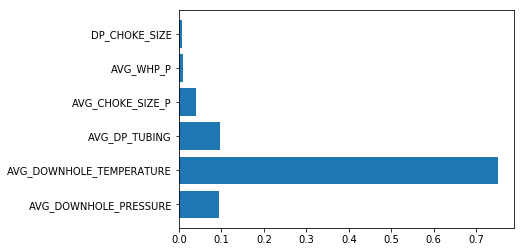

In [41]:
plt.barh(y_pos, model_rf.feature_importances_, align='center', alpha=1)
plt.yticks(y_pos, df.columns[0:6])


In [42]:
import xgboost as xgb
import lightgbm as lgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [43]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [44]:
model_xgb.score(x_val, y_val)

0.9648116722917768

In [45]:
model_xgb.score(x_test, y_test)

0.9579307836022342

In [46]:
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr as r
print(mse(y_val, model_xgb.predict(x_val)))
print(mse(y_test, model_xgb.predict(x_test)))
r(y_test, model_xgb.predict(x_test).reshape(-1,1))[0]

0.0013742440263828993
0.0014548737071592651


array([0.97951031])

In [47]:
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_xgb.reshape(-1,),
                   name = "Extreme Gradient Boosting",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(
                    color = 'rgb(255, 0, 0)'))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [48]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [49]:
model_lgb.fit(x_train, y_train)
print(model_lgb.score(x_val, y_val))
print(model_lgb.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9593148745495904
0.9410518570590701


In [50]:
print(mse(y_val, model_lgb.predict(x_val)))
print(mse(y_test, model_lgb.predict(x_test)))
r(y_test, model_lgb.predict(x_test).reshape(-1,1))[0]

0.001588915821077741
0.0020385952150793925


array([0.97038488])

In [51]:
y_pred_lgb = scaler_y.inverse_transform(model_lgb.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_lgb.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [52]:
model_ett = ExtraTreesRegressor()
model_ett.fit(x_train, y_train)
model_ett.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9839692004937567

In [53]:
model_ett.score(x_test, y_test)

0.9843602153278508

In [54]:
print(mse(y_val, model_ett.predict(x_val)))
print(mse(y_test, model_ett.predict(x_test)))
r(y_test, model_ett.predict(x_test).reshape(-1,1))[0]

0.0006260664229987975
0.0005408684414276606


array([0.99226486])

In [55]:
y_pred_ett = scaler_y.inverse_transform(model_ett.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ett.reshape(-1,),
                   name = "Extra Trees Regression",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [56]:
model_knr = KNeighborsRegressor(n_neighbors = 3)
model_knr.fit(x_train, y_train)
model_knr.score(x_val, y_val)

0.9747172899190298

In [57]:
model_knr.score(x_test, y_test)

0.9716876956283107

In [58]:
print(mse(y_val, model_knr.predict(x_val)))
print(mse(y_test, model_knr.predict(x_test)))
r(y_test, model_knr.predict(x_test).reshape(-1,1))[0]

0.0009873902956583072
0.0009791203817537376


array([0.98595854])

In [59]:
y_pred_knr = scaler_y.inverse_transform(model_knr.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_knr.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [60]:
model_dct = DecisionTreeRegressor()
model_dct.fit(x_train, y_train)
model_dct.score(x_val, y_val)

0.9634760541154289

In [61]:
model_dct.score(x_test, y_test)

0.9679672713163188

In [62]:
print(mse(y_val, model_dct.predict(x_val)))
print(mse(y_test, model_dct.predict(x_test)))
r(y_test, model_dct.predict(x_test).reshape(-1,1))[0]

0.0014264052235728832
0.0011077832848089195


array([0.98402716])

In [63]:
y_pred_dct = scaler_y.inverse_transform(model_dct.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_dct.reshape(-1,),
                   name = "Decision Tree Regression",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [64]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)
model_ridge.score(x_val, y_val)

0.8557584591880314

In [65]:
model_ridge.score(x_test, y_test)

0.8398653007839156

In [66]:
print(mse(y_val, model_ridge.predict(x_val)))
print(mse(y_test, model_ridge.predict(x_test)))
r(y_test, model_ridge.predict(x_test).reshape(-1,1))[0]

0.005633205347544539
0.005537915450826213


array([0.91768945])

In [67]:
y_pred_ridge = scaler_y.inverse_transform(model_ridge.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ridge.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10),
                   marker = dict(color = 'rgb(255,0,0)'))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [68]:
model_svr = SVR()
model_svr.fit(x_train, y_train)
model_svr.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8789166637966064

In [69]:
model_svr.score(x_test, y_test)

0.8725849984702093

In [70]:
print(mse(y_val, model_svr.predict(x_val)))
print(mse(y_test, model_svr.predict(x_test)))
r(y_test, model_svr.predict(x_test).reshape(-1,1))[0]

0.00472878543282237
0.004406374815034465


array([0.94118185])

In [71]:
trace2 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_gbm.reshape(-1,),
                   name = "Gradient Boosting Machine",
                   mode = 'markers',
                   line=dict(width=10))
trace3 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_rf.reshape(-1,),
                   name = "Random Forest",
                   mode = 'markers',
                   line=dict(width=10))
trace4 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_xgb.reshape(-1,),
                   name = "Extreme Gradient Boosting",
                   mode = 'markers',
                   line=dict(width=10))
trace5 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ett.reshape(-1,),
                   name = "Extra Trees Regression",
                   mode = 'markers',
                   line=dict(width=10))
trace6 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_dct.reshape(-1,),
                   name = "Decision Tree Regression",
                   mode = 'markers',
                   line=dict(width=10))
data = [ trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted gas rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)